# Importing necessary libraries

In [ ]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the individual .csv files and merging them into a single data frame

In [ ]:
# Load all CSV files
file_paths = glob.glob("/Users/nareshchethala/Desktop/University/Blue_Bikes/Trip_data/*.csv")
df_list = [pd.read_csv(file) for file in file_paths]

# Combine into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# Displaying the basic information and first few rows of the DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25062926 entries, 0 to 25062925
Data columns (total 29 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ride_id                  object 
 1   rideable_type            object 
 2   started_at               object 
 3   ended_at                 object 
 4   start_station_name       object 
 5   start_station_id         object 
 6   end_station_name         object 
 7   end_station_id           object 
 8   start_lat                float64
 9   start_lng                float64
 10  end_lat                  float64
 11  end_lng                  float64
 12  member_casual            object 
 13  tripduration             float64
 14  starttime                object 
 15  stoptime                 object 
 16  start station id         float64
 17  start station name       object 
 18  start station latitude   float64
 19  start station longitude  float64
 20  end station id           object 
 21  end st

# Data Cleaning

## Dropping the columns with Null values or columns that are not optimistic

In [ ]:
df = df.drop(columns=['start station id', 'start station name','start station latitude','end station longitude','starttime','stoptime','usertype','tripduration'])

In [25]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25062926 entries, 0 to 25062925
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 2.4+ GB
None
            ride_id  rideable_type               started_at  \
0  5FA2A0E02EC53028   classic_bike  2024-07-11 02:07:46.443   
1  5D49B9B78C826FD5   classic_bike  2024-07-19 14:07:03.620   
2  5FEF6FE539C078FB  electric_bike  2024-07-02 09:06:08.296   
3  709B58276144026B   classic_bike  2024-07-30 13:55:16.971   
4  15755F52835908F

In [ ]:
#Making sure that the date columns are in the correct data type
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

In [ ]:
#Calculating the trip duration in seconds
df['trip_duration_sec'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

In [ ]:
#Calculating the trip duration in minutes
df['trip_duration_min'] = df['trip_duration_sec'] / 60

In [ ]:
df.head()

In [46]:
# removing the negative or zero duration
df = df[df['trip_duration_sec'] > 0]

In [ ]:
# Checking for missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])  # Show only columns with missing values

start_station_name    0.026758
start_station_id      0.026758
end_station_name      0.163876
end_station_id        0.177704
end_lat               0.072406
end_lng               0.072406
dtype: float64


In [49]:
# As the missing values are below 5% we can drop the rows
df = df.dropna()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3450017 entries, 0 to 21783391
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  trip_duration_sec   float64       
 14  trip_duration_min   float64       
dtypes: datetime64[ns](2), float64(6), object(7)
memory usage: 421.1+ MB


In [51]:
#verifying the null values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

Series([], dtype: float64)


In [53]:
# Verifying that there are no missing values
print(df.isnull().sum().sum())

0


In [55]:
#verifying datatypes
print(df.dtypes)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
trip_duration_sec            float64
trip_duration_min            float64
dtype: object


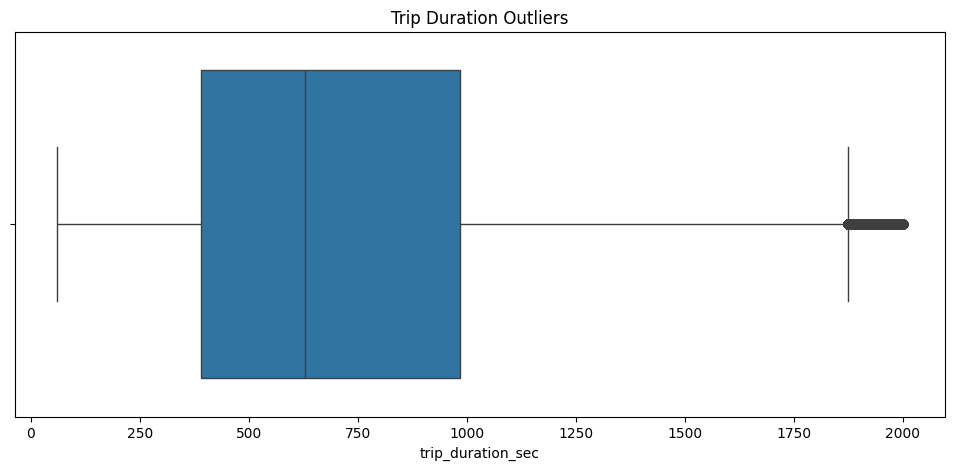

In [65]:
#checking for any outliers in the trip duration
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.boxplot(x=df['trip_duration_sec'])
plt.title("Trip Duration Outliers")
plt.show()

In [ ]:
# Remove outliers
df = df[df['trip_duration_sec'] < 3600]  # Keep only trips <33 mins because of outliers

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3197525 entries, 0 to 21783391
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  trip_duration_sec   float64       
 14  trip_duration_min   float64       
dtypes: datetime64[ns](2), float64(6), object(7)
memory usage: 390.3+ MB


In [ ]:
#Making sure that there are no negative or zero durations
print(f"Negative Durations: {(df['trip_duration_sec'] < 0).sum()}")
print(f"Zero Durations: {(df['trip_duration_sec'] == 0).sum()}")

# Remove invalid durations
df = df[df['trip_duration_sec'] > 0]

Negative Durations: 0
Zero Durations: 0


In [ ]:
# Making sure that the latitudes and longitudes are valid
print(f"Invalid Latitudes: {(df['start_lat'] < -90) | (df['start_lat'] > 90).sum()}")
print(f"Invalid Longitudes: {(df['start_lng'] < -180) | (df['start_lng'] > 180).sum()}")

Invalid Latitudes: 0           False
1           False
2           False
4           False
5           False
            ...  
21783387    False
21783388    False
21783389    False
21783390    False
21783391    False
Name: start_lat, Length: 3197525, dtype: bool
Invalid Longitudes: 0           False
1           False
2           False
4           False
5           False
            ...  
21783387    False
21783388    False
21783389    False
21783390    False
21783391    False
Name: start_lng, Length: 3197525, dtype: bool


In [ ]:
#Display the basic information and first few rows of the DataFrame
print(df.info()) 
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3197525 entries, 0 to 21783391
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  trip_duration_sec   float64       
 14  trip_duration_min   float64       
dtypes: datetime64[ns](2), float64(6), object(7)
memory usage: 390.3+ MB
None
                          started_at                       ended_at  \
count                        3197525                        31

### SAVING THE DATAFRAME INTO A .csv file

In [ ]:
df.to_csv('/Users/nareshchethala/Desktop/University/Blue_Bikes/Full_dataset.csv', index=False)

# Data Visualization

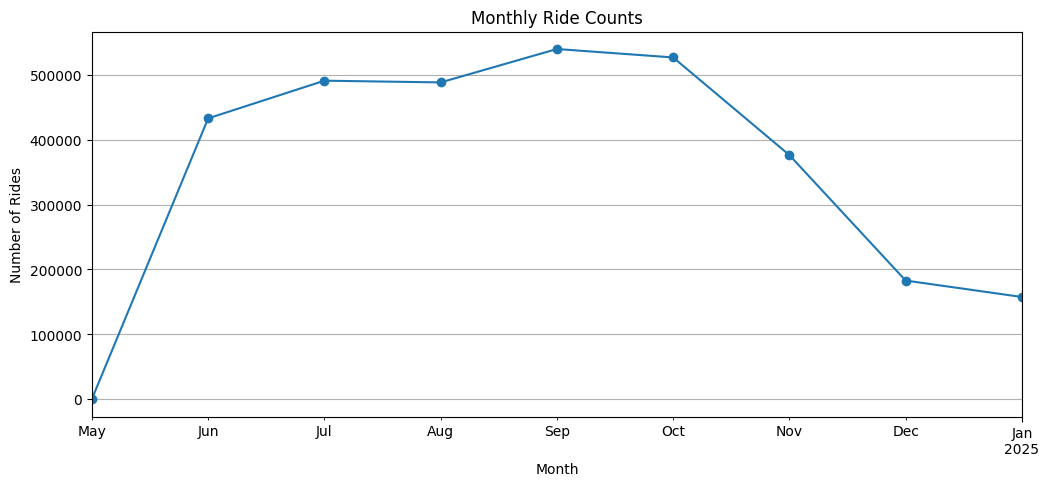

In [ ]:
#Seasonality of Rides
import matplotlib.pyplot as plt

# Extract year-month for aggregation
df['month'] = df['started_at'].dt.to_period("M")

# Count rides per month
monthly_rides = df.groupby('month').size()

# Plot
plt.figure(figsize=(12, 5))
monthly_rides.plot(kind='line', marker='o', title="Monthly Ride Counts")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.grid()
plt.show()

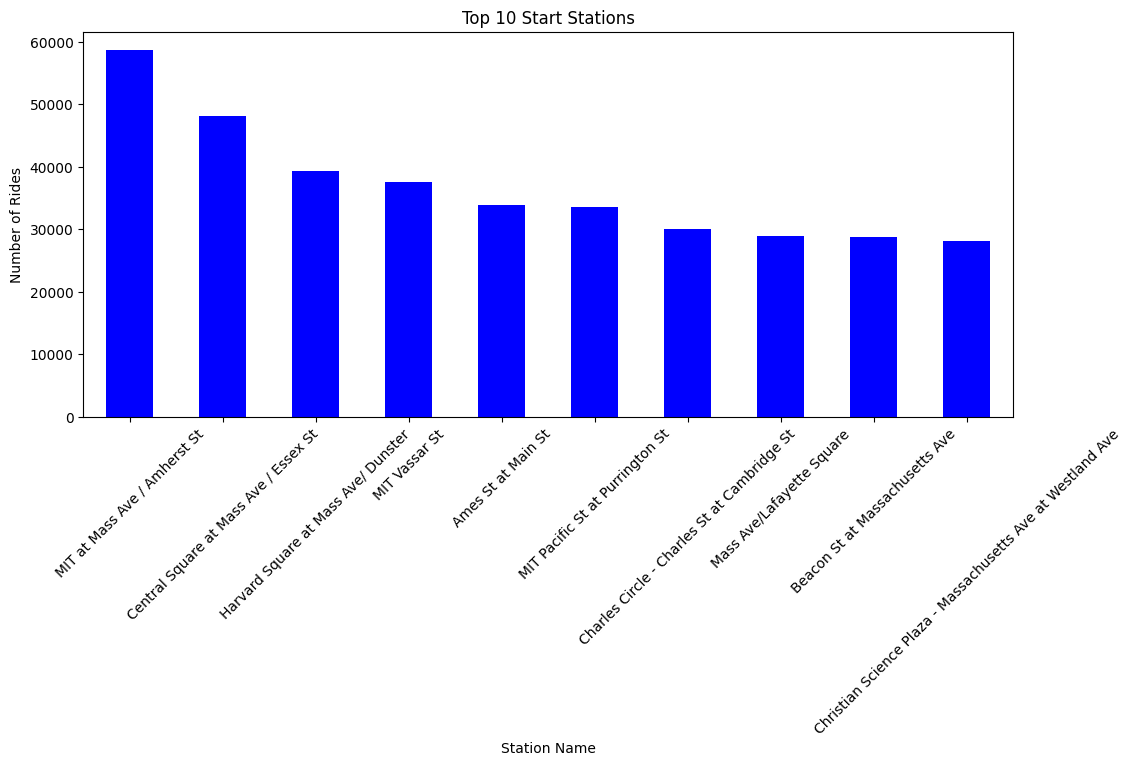

In [ ]:
# Displaying the Top 10 Start Stations
top_start_stations = df['start_station_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 5))
top_start_stations.plot(kind='bar', color='blue', title="Top 10 Start Stations")
plt.xlabel("Station Name")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

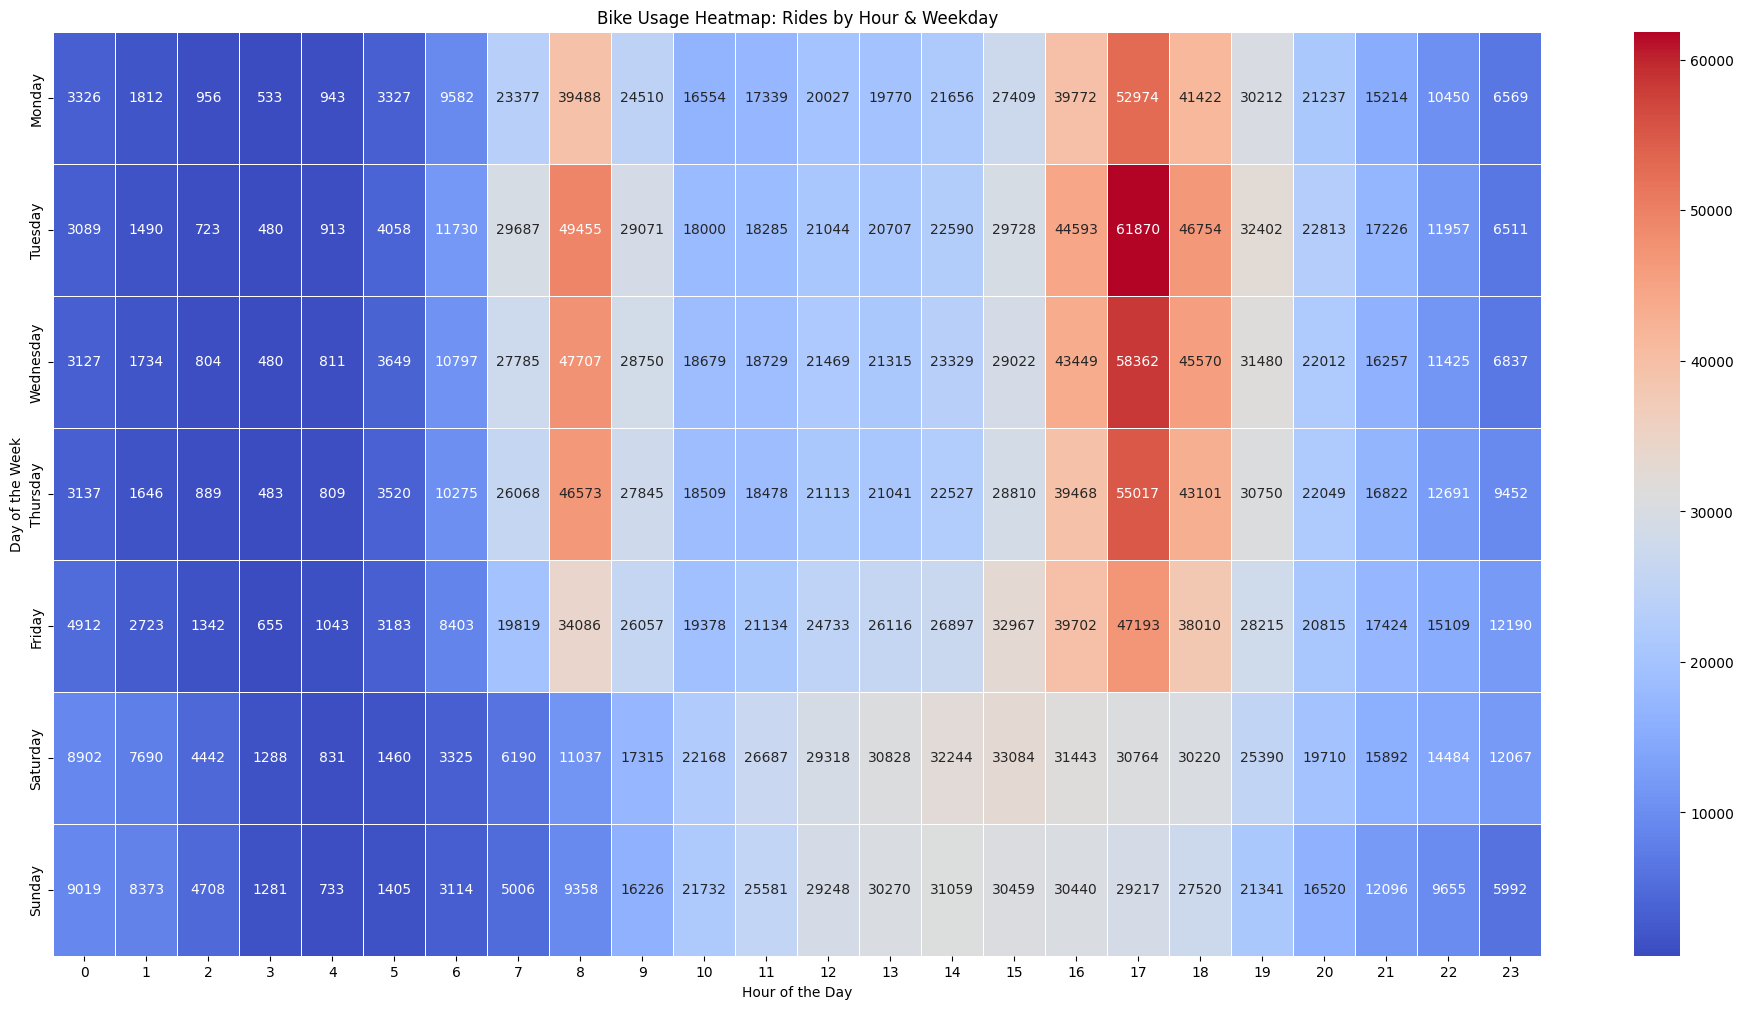

In [ ]:
# Extract hour and weekday
df['hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.day_name()

# Pivot table: Rides per weekday-hour
heatmap_data = df.pivot_table(index='weekday', columns='hour', values='trip_duration_sec', aggfunc='count')

# Reorder weekdays for better visualization
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(order)

# Plot heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Bike Usage Heatmap: Rides by Hour & Weekday")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

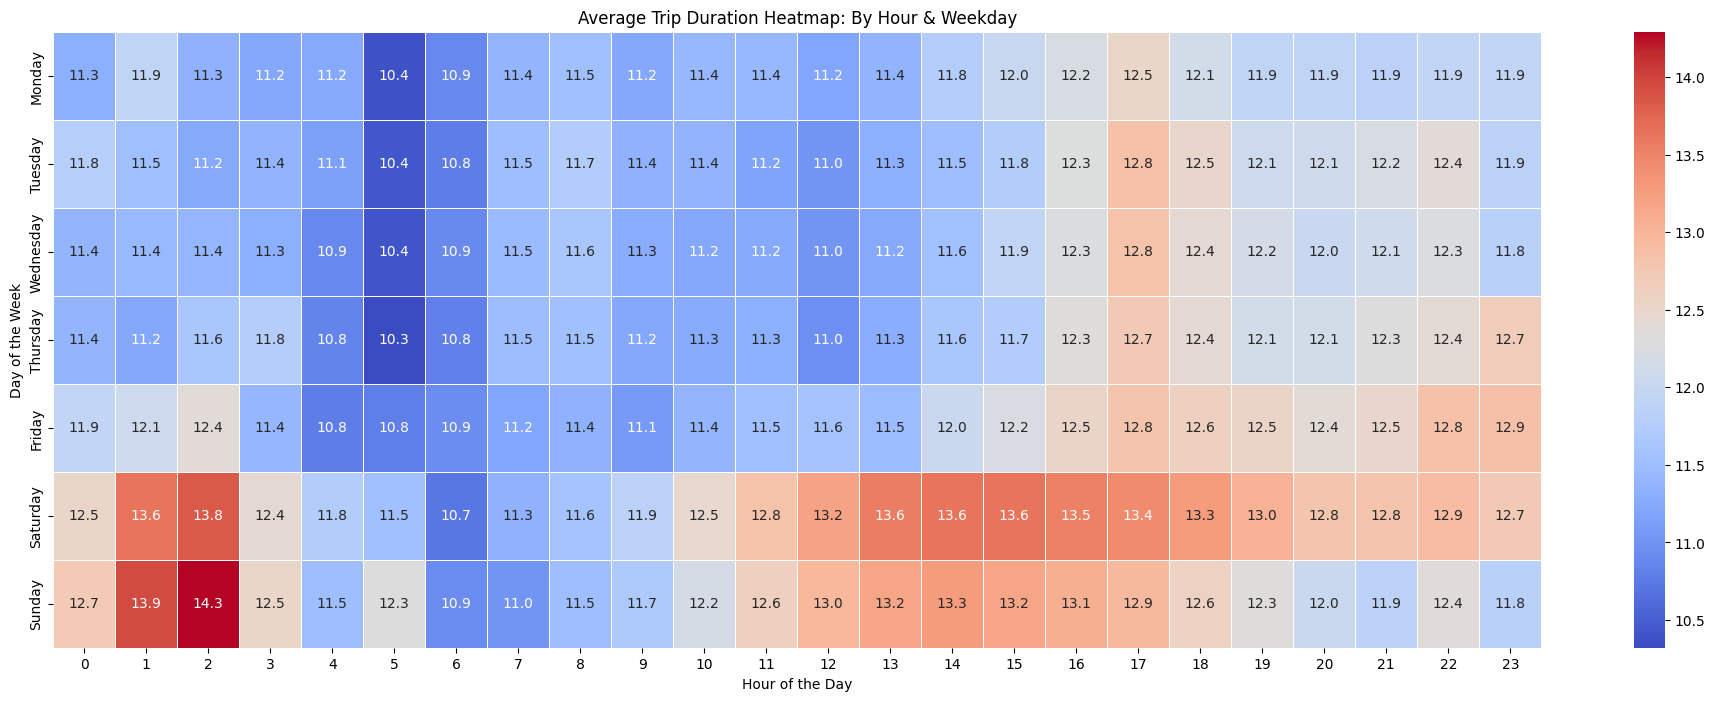

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract hour and weekday
df['hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.day_name()

# Pivot table: Average trip duration per weekday-hour
heatmap_data = df.pivot_table(index='weekday', columns='hour', values='trip_duration_min', aggfunc='mean')

# Reorder weekdays for better visualization
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(order)

# Plot heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Average Trip Duration Heatmap: By Hour & Weekday")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

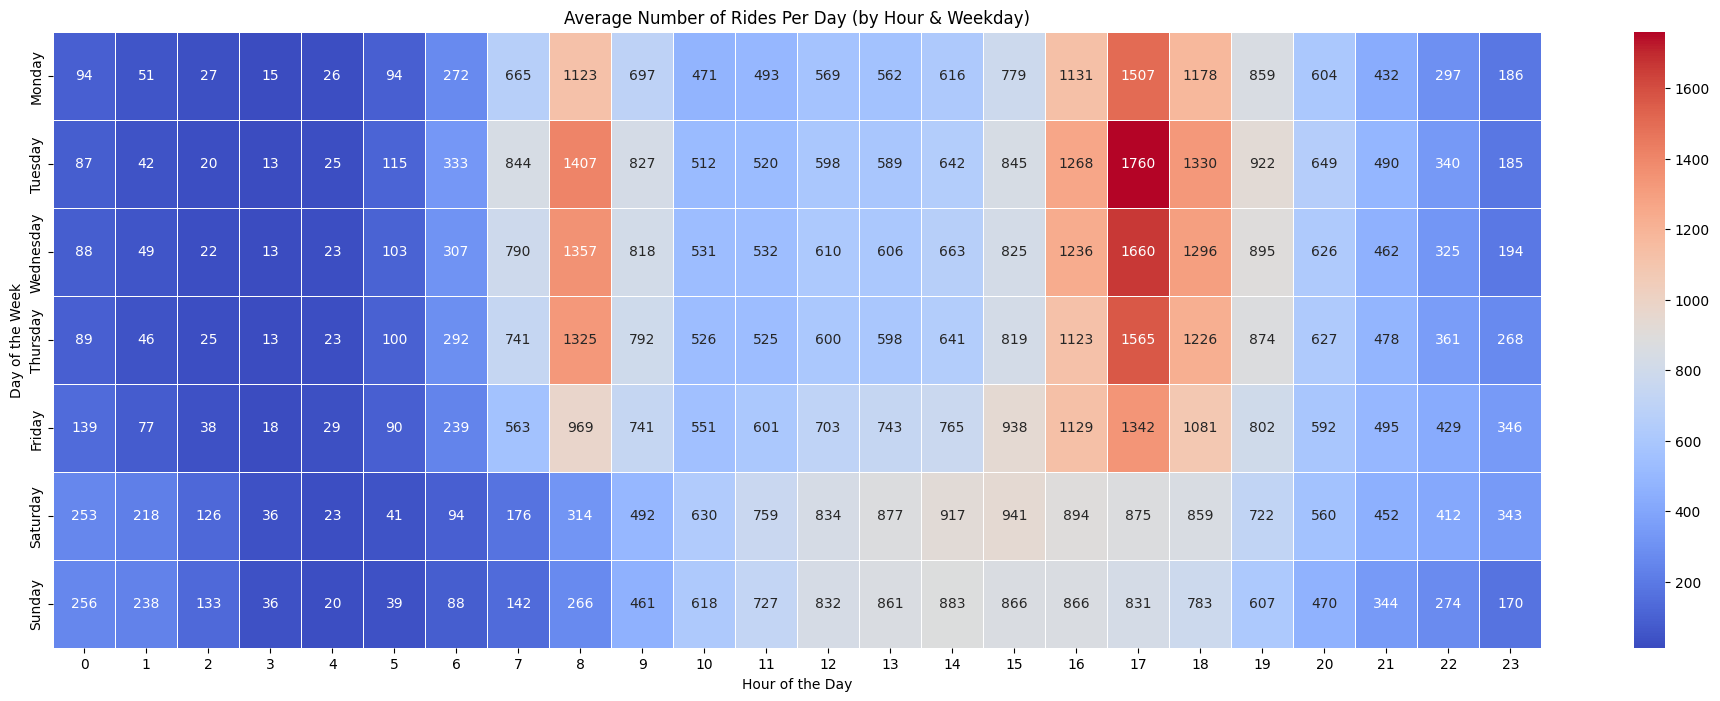

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract hour and weekday
df['hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.day_name()

# Count total rides per (hour, weekday)
rides_per_hour_weekday = df.groupby(['weekday', 'hour']).size().reset_index(name='ride_count')

# Get the total number of weeks in the dataset
total_days = df['started_at'].dt.date.nunique()
total_weeks = total_days / 7  # Approximate weeks in dataset

# Compute average rides per day
rides_per_hour_weekday['avg_rides_per_day'] = (rides_per_hour_weekday['ride_count'] / total_weeks).astype(int)

# Pivot table for heatmap
heatmap_data = rides_per_hour_weekday.pivot(index='weekday', columns='hour', values='avg_rides_per_day')

# Reorder weekdays for better visualization
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(order)

# Plot heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Average Number of Rides Per Day (by Hour & Weekday)")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

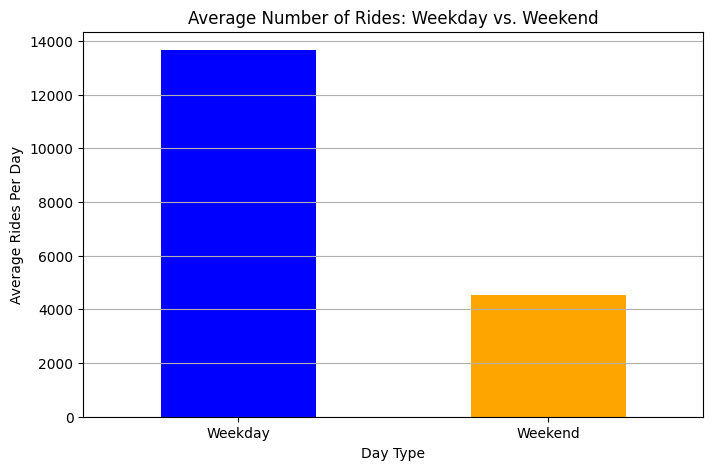

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract weekday (0=Monday, 6=Sunday) and label as 'Weekday' or 'Weekend'
df['day_of_week'] = df['started_at'].dt.dayofweek
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Count total rides per day type
rides_per_day_type = df.groupby('day_type').size()

# Get total number of weeks
total_days = df['started_at'].dt.date.nunique()
total_weeks = total_days / 7  # Approximate weeks in dataset

# Compute average rides per day
avg_rides_per_day_type = (rides_per_day_type / (total_weeks * 5)) if 'Weekday' in rides_per_day_type else (rides_per_day_type / (total_weeks * 2))

# Plot bar chart
plt.figure(figsize=(8, 5))
avg_rides_per_day_type.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Number of Rides: Weekday vs. Weekend")
plt.xlabel("Day Type")
plt.ylabel("Average Rides Per Day")
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

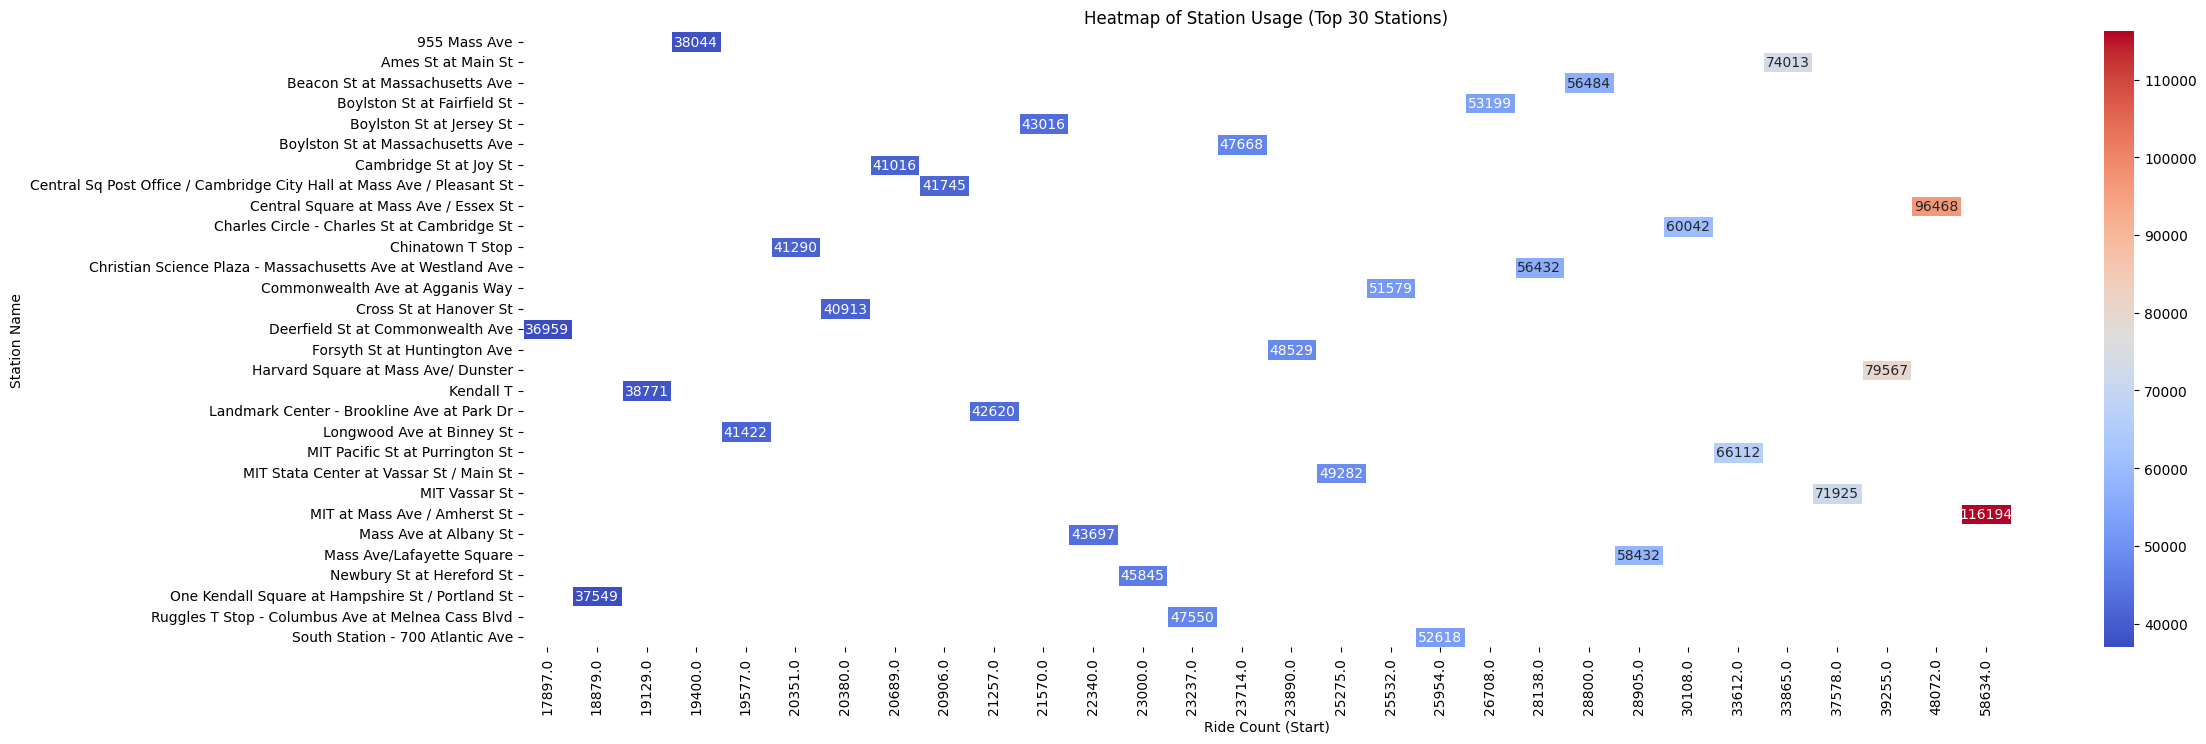

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Count number of rides per start and end station
start_station_counts = df['start_station_name'].value_counts().reset_index()
start_station_counts.columns = ['station_name', 'ride_count_start']

end_station_counts = df['end_station_name'].value_counts().reset_index()
end_station_counts.columns = ['station_name', 'ride_count_end']

# Merge both start and end counts
station_usage = pd.merge(start_station_counts, end_station_counts, on='station_name', how='outer').fillna(0)

# Compute total rides per station
station_usage['total_rides'] = station_usage['ride_count_start'] + station_usage['ride_count_end']

# Pivot table for heatmap (Top 30 busiest stations for better readability)
top_stations = station_usage.nlargest(30, 'total_rides')
heatmap_data = top_stations.pivot(index='station_name', columns='ride_count_start', values='total_rides')

# Plot heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Station Usage (Top 30 Stations)")
plt.xlabel("Ride Count (Start)")
plt.ylabel("Station Name")
plt.yticks(rotation=0)
plt.show()


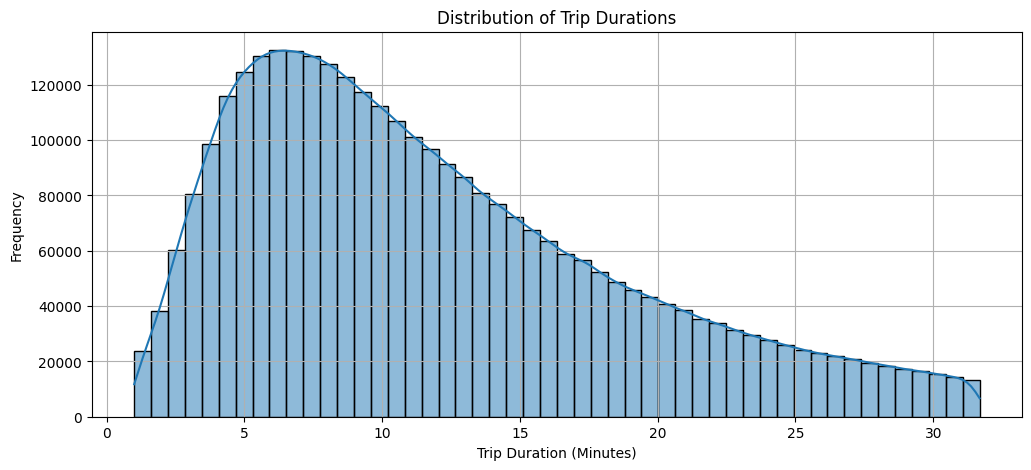

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a reasonable limit (e.g., 99th percentile) to remove extreme outliers
trip_duration_limit = df['trip_duration_sec'].quantile(0.99)
filtered_df = df[df['trip_duration_sec'] <= trip_duration_limit]

# Plot histogram
plt.figure(figsize=(12, 5))
sns.histplot(filtered_df['trip_duration_sec'] / 60, bins=50, kde=True)  # Convert seconds to minutes
plt.xlabel("Trip Duration (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Durations")
plt.grid()
plt.show()

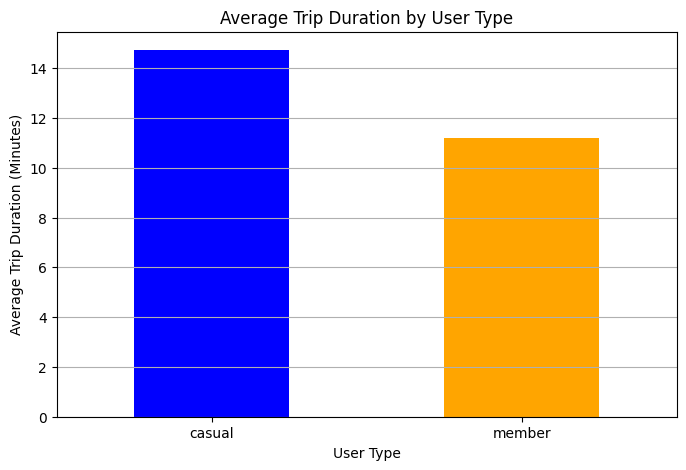

In [106]:
# Group by user type and compute average trip duration
avg_trip_duration = df.groupby('member_casual')['trip_duration_min'].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
avg_trip_duration.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("User Type")
plt.ylabel("Average Trip Duration (Minutes)")
plt.title("Average Trip Duration by User Type")
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

<Figure size 1200x500 with 0 Axes>

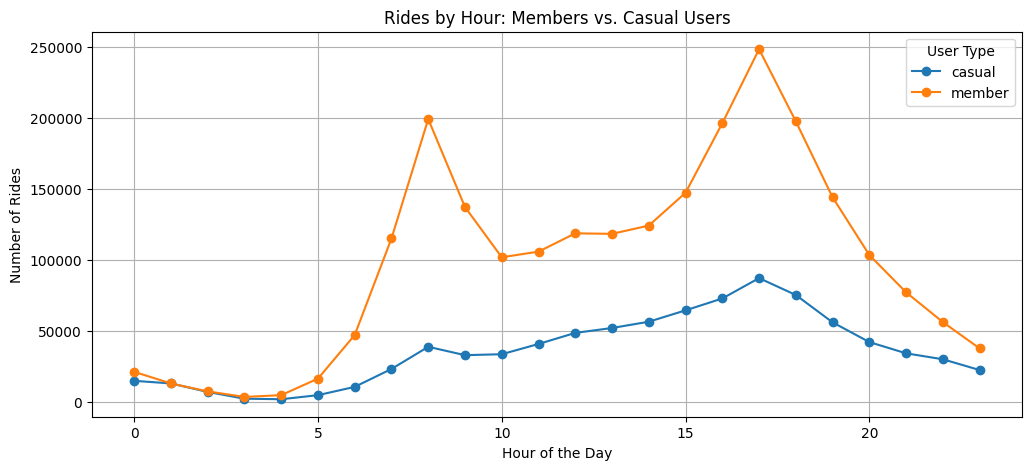

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by hour and user type
hourly_trends = df.groupby(['hour', 'member_casual']).size().unstack()

# Plot line chart
plt.figure(figsize=(12, 5))
hourly_trends.plot(kind='line', marker='o', figsize=(12, 5))
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Rides by Hour: Members vs. Casual Users")
plt.grid()
plt.legend(title="User Type")
plt.show()

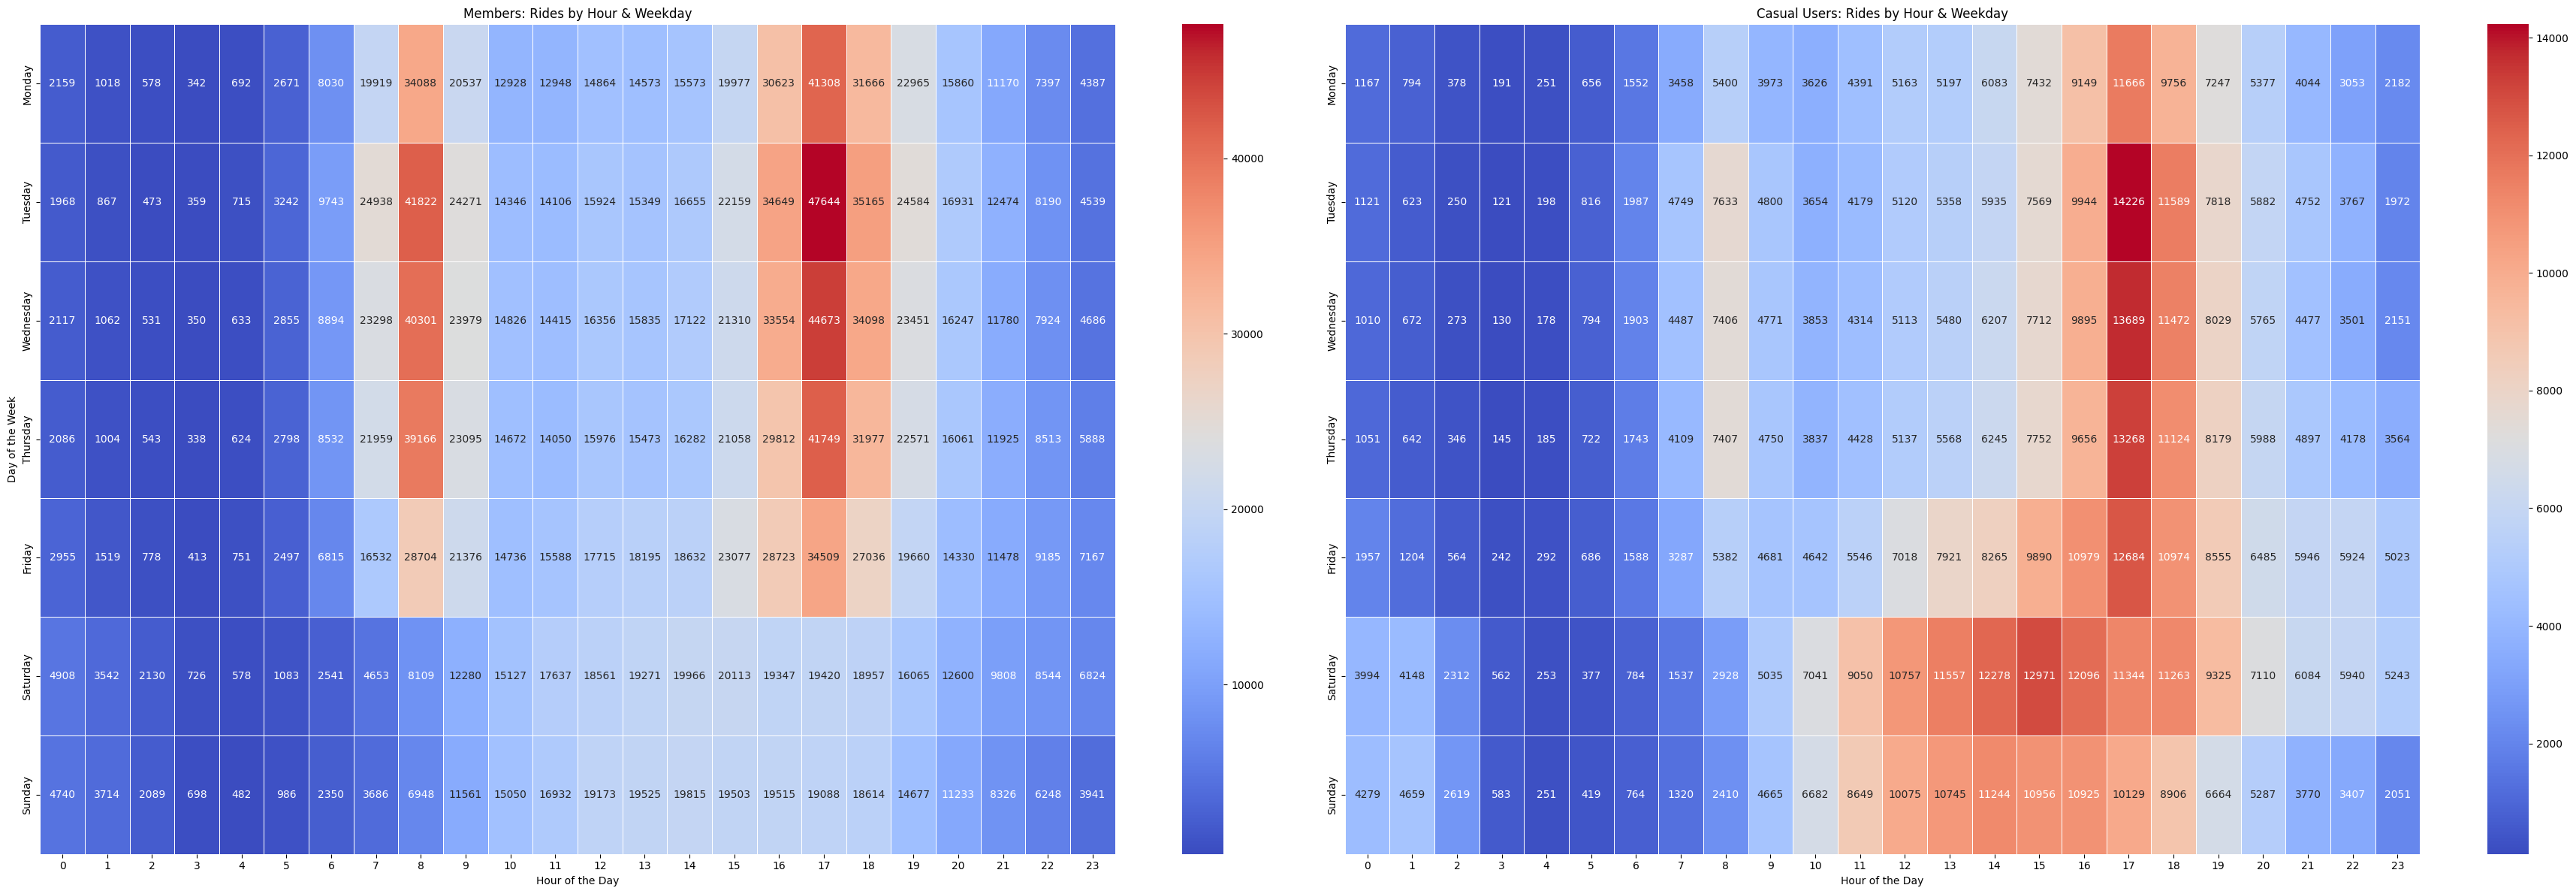

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract hour and weekday
df['hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.day_name()

# Group by hour, weekday, and user type, then count rides
hourly_rides = df.groupby(['weekday', 'hour', 'member_casual']).size().reset_index(name='ride_count')

# Pivot table for members
heatmap_members = hourly_rides[hourly_rides['member_casual'] == 'member'].pivot(index='weekday', columns='hour', values='ride_count')

# Pivot table for casual users
heatmap_casual = hourly_rides[hourly_rides['member_casual'] == 'casual'].pivot(index='weekday', columns='hour', values='ride_count')

# Reorder weekdays
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_members = heatmap_members.reindex(order)
heatmap_casual = heatmap_casual.reindex(order)

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(36, 12))

# Members Heatmap
sns.heatmap(heatmap_members, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Members: Rides by Hour & Weekday")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Day of the Week")

# Casual Users Heatmap
sns.heatmap(heatmap_casual, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Casual Users: Rides by Hour & Weekday")
axes[1].set_xlabel("Hour of the Day")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

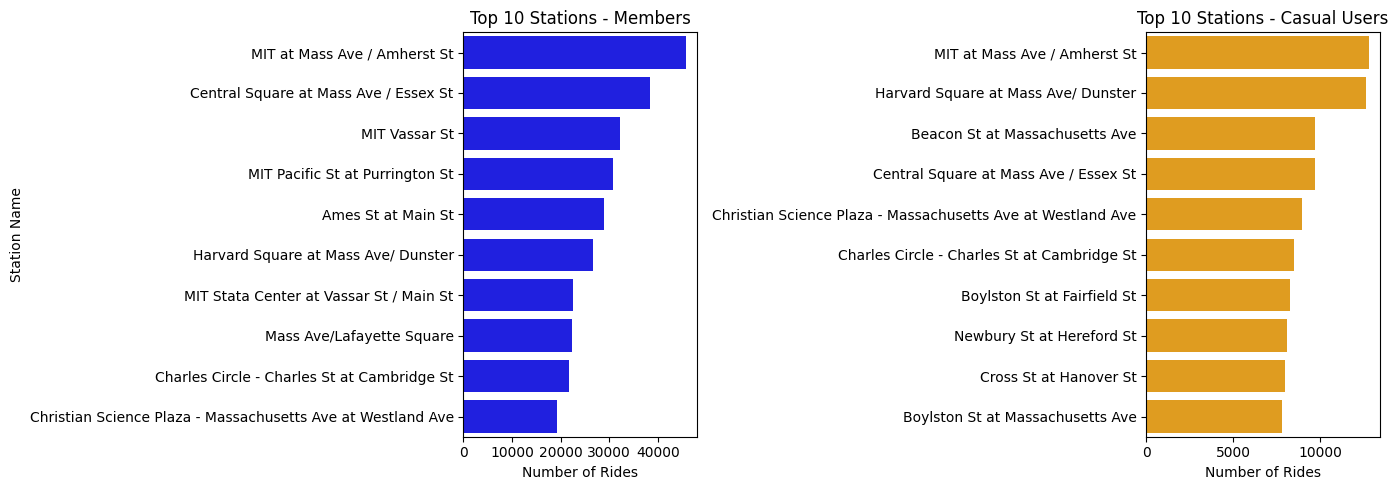

In [108]:
# Count trips by start station and user type
top_stations = df.groupby(['start_station_name', 'member_casual']).size().reset_index(name='ride_count')

# Split into two DataFrames
top_members = top_stations[top_stations['member_casual'] == 'member'].nlargest(10, 'ride_count')
top_casual = top_stations[top_stations['member_casual'] == 'casual'].nlargest(10, 'ride_count')

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Members
sns.barplot(y='start_station_name', x='ride_count', data=top_members, ax=axes[0], color='blue')
axes[0].set_title("Top 10 Stations - Members")
axes[0].set_xlabel("Number of Rides")
axes[0].set_ylabel("Station Name")

# Casual Users
sns.barplot(y='start_station_name', x='ride_count', data=top_casual, ax=axes[1], color='orange')
axes[1].set_title("Top 10 Stations - Casual Users")
axes[1].set_xlabel("Number of Rides")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

/var/folders/w1/vt1xc8rs7w9f0fs5spyxbzcc0000gn/T/ipykernel_14908/1974222873.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_routes.apply(lambda x: f"{x['start_station_name']} → {x['end_station_name']}", axis=1),


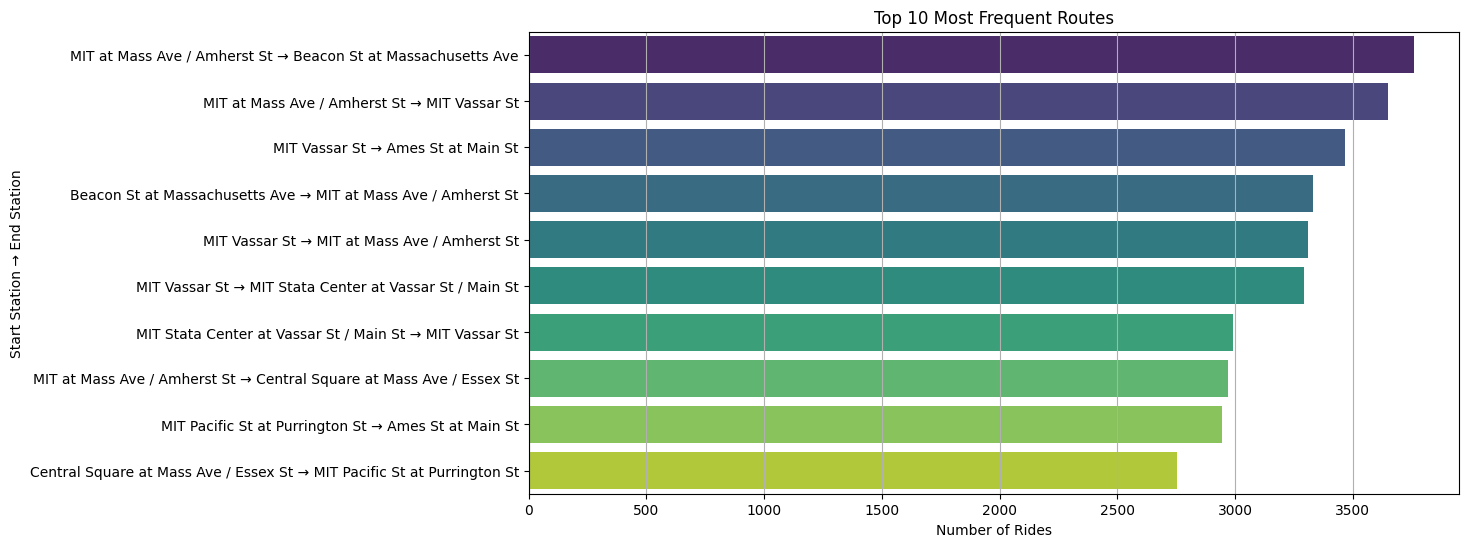

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count trips per start-end station pair
route_counts = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='ride_count')

# Get the top 10 most frequent routes
top_routes = route_counts.nlargest(10, 'ride_count')

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y=top_routes.apply(lambda x: f"{x['start_station_name']} → {x['end_station_name']}", axis=1), 
            x=top_routes['ride_count'], palette="viridis")

plt.xlabel("Number of Rides")
plt.ylabel("Start Station → End Station")
plt.title("Top 10 Most Frequent Routes")
plt.xticks(rotation=0)
plt.grid(axis='x')

plt.show()

In [115]:
import pandas as pd

# Compute key trip duration statistics with better formatting
trip_stats = {
    "Total Rides": f"{len(df):,}",  # Adds comma separator for large numbers
    "Average Duration (min)": f"{df['trip_duration_min'].mean():.2f}",  # Rounds to 2 decimal places
    "Median Duration (min)": f"{df['trip_duration_min'].median():.2f}",
    "Shortest Trip (min)": f"{df['trip_duration_min'].min():.2f}",
    "Longest Trip (min)": f"{df['trip_duration_min'].max():.2f}",
    "Standard Deviation (min)": f"{df['trip_duration_min'].std():.2f}"
}

# Convert to DataFrame
trip_stats_df = pd.DataFrame(list(trip_stats.items()), columns=["Metric", "Value"])

# Display statistics
print(trip_stats_df)

                     Metric      Value
0               Total Rides  3,197,525
1    Average Duration (min)      12.14
2     Median Duration (min)      10.49
3       Shortest Trip (min)       1.00
4        Longest Trip (min)      33.33
5  Standard Deviation (min)       7.25


In [117]:
# Compute station statistics
total_stations = df['start_station_name'].nunique()
most_used_station = df['start_station_name'].value_counts().idxmax()
least_used_station = df['start_station_name'].value_counts().idxmin()

# Create DataFrame
station_stats = {
    "Total Unique Stations": total_stations,
    "Most Used Station": most_used_station,
    "Least Used Station": least_used_station
}

station_stats_df = pd.DataFrame(list(station_stats.items()), columns=["Metric", "Value"])

# Print station statistics
print(station_stats_df)

                  Metric                         Value
0  Total Unique Stations                           545
1      Most Used Station  MIT at Mass Ave / Amherst St
2     Least Used Station      Jamaicaway at Perkins St
